# Medical_Leave_One_out_expert_based - (random) Max vs increasing CB !

## support_prim_medical_expert_attributes

In [1]:
# To enable the autocomplete feature based upon clicking the TAB button
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Rest API call

In [3]:
import requests
import json

In [4]:
baseurl = 'http://localhost:8080'
headers = 'application/json'

default_casebase = 'support_prim_cb_latest'
default_concept = 'patient'
default_globalSim='global_sim_1'

default_cases_limit=-1 

### Get all instances from a given casebase - GET call

In [5]:
#%%time
casebase_name_gai = 'support_prim_cb_latest'

def getAllInstances():
    url_gai = baseurl+'/instances?casebaseName='+casebase_name_gai
    
    response_gai = requests.get( url=url_gai)
    
    response_json_gai = response_gai.json()
        
    df_response_gai = pd.DataFrame(response_json_gai)
            
    # for sorting
    # df_response = df_response.sort_values(by=['caseID'], ascending=[False])
    
    return df_response_gai

getAllInstances().head();

In [6]:
instances = getAllInstances()
print( instances.shape)
instances.head()

(258, 15)


,age,bmi,caseID,fear_1,gender,gpe_3,hscl10_mean_1,id,oreb_sum_1,pain_sites,painsite_1,psfs1_1,psfs2_1,psfs3_1,sleep15D_1
0,46,25.909456,patient132,0,female,1,1.1,281,20,_unknown_,_unknown_,5,3,3,sleep normally
1,31,24.02381,patient253,0,female,2,1.2,500,_unknown_,_unknown_,1,5,5,_unknown_,sleep normally
2,70,27.774271,patient131,6,male,2,1.3,280,47,_unknown_,_unknown_,6,4,4,sleep normally
3,37,24.280975,patient252,0,female,1,1.8,499,32,_unknown_,4,1,_unknown_,_unknown_,slight problem
4,22,20.438166,patient130,7,female,1,1.3,279,16,_unknown_,_unknown_,4,8,7,slight problem


In [7]:
case_inst = instances.copy(deep=True)
case_inst = case_inst.set_index( case_inst.caseID )
case_inst.drop( columns='caseID', inplace=True)
case_inst.replace('_unknown_', np.NaN, inplace=True)
case_inst['gpe_3'] = case_inst['gpe_3'].astype(int)
case_inst['gpe_3'] = case_inst['gpe_3'].astype(int)
case_inst.gpe_3.dtype
case_inst.head()

,age,bmi,fear_1,gender,gpe_3,hscl10_mean_1,id,oreb_sum_1,pain_sites,painsite_1,psfs1_1,psfs2_1,psfs3_1,sleep15D_1
caseID,,,,,,,,,,,,,,
patient132,46,25.909456,0,female,1,1.1,281,20,NaN,NaN,5,3,3,sleep normally
patient253,31,24.02381,0,female,2,1.2,500,NaN,NaN,1,5,5,NaN,sleep normally
patient131,70,27.774271,6,male,2,1.3,280,47,NaN,NaN,6,4,4,sleep normally
patient252,37,24.280975,0,female,1,1.8,499,32,NaN,4,1,NaN,NaN,slight problem
patient130,22,20.438166,7,female,1,1.3,279,16,NaN,NaN,4,8,7,slight problem


### Retrieve from dependent casebase - GET call

In [8]:
#http://localhost:8080/expDependentCasebase?casebase=support_prim_cb_latest&concept%20name=patient
#        &amalgamation%20function=global_sim_1&no%20of%20returned%20cases=-1
#        &List%20of%20case%20IDS=patient0%2Cpatient1%2Cpatient2
        
default_list = 'patient0,patient1,patient2'

def executeSimOnAllCases(listOfCases=default_list, cases_limit_rsc=default_cases_limit):
    
    url_rsc = baseurl+'/expDependentCasebase?casebase='+default_casebase+'&concept%20name='+default_concept+'&amalgamation%20function='+default_globalSim+'&no%20of%20returned%20cases='+cases_limit_rsc.__str__()+'&List%20of%20case%20IDS='+listOfCases
    
    response_rsc = requests.get( url=url_rsc)
    
    response_json_rsc = response_rsc.json()
    
    df_response_rsc = pd.DataFrame(response_json_rsc)
    
    return df_response_rsc

### Retrieve from independent casebase - GET call

In [9]:
#http://localhost:8080/expIndependentCasebase?casebase=support_prim_cb_latest&concept%20name=patient
#  &amalgamation%20function=global_sim_1&no%20of%20returned%20cases=-1
#  &List%20of%20case%20IDS%20for%20retrival=patient0%2Cpatient1%2Cpatient2
#  &List%20of%20case%20IDS%20for%20casebase=patient0%2Cpatient1%2Cpatient2%2Cpatient3%2Cpatient4

        
default_retrieval_list = 'patient0,patient1,patient2,patient3'
default_cb_list = 'patient0,patient1,patient2,patient3,patient4,patient5'

def executeSimOnSelectedCases(listOfRetrievalCases=default_retrieval_list, listOfCbCases=default_cb_list, k=default_cases_limit):
    
    url_rsc = baseurl+'/expIndependentCasebase?casebase='+default_casebase+'&concept%20name='+default_concept+'&amalgamation%20function='+default_globalSim+'&no%20of%20returned%20cases='+k.__str__()+'&List%20of%20case%20IDS%20for%20retrival='+listOfRetrievalCases+'&List%20of%20case%20IDS%20for%20casebase='+listOfCbCases
    
    response_rsc = requests.get( url=url_rsc)
    
    response_json_rsc = response_rsc.json()
        
    df_response_rsc = pd.DataFrame(response_json_rsc)

    return df_response_rsc

In [10]:
re_df = executeSimOnSelectedCases()
re_df.head(7)

,patient0,patient1,patient2,patient3
patient0,1.000000,0.345087,0.431234,0.278326
patient1,0.345087,1.000000,0.438239,0.180523
patient2,0.431234,0.438239,1.000000,0.456389
patient3,0.278326,0.180523,0.456389,1.000000
patient4,0.436590,0.375774,0.484220,0.323751
patient5,0.325293,0.413838,0.486467,0.239591


### Get attribute range from concept model - GET call

In [11]:
# http://localhost:8080/values?concept%20name=patient&attribute%20name=gpe_3

deafult_attribute = 'id'

def getAttributeRange(attribute=deafult_attribute): 
    url_rsc = baseurl+'/values?concept%20name='+default_concept+'&attribute%20name='+attribute
    
    response_rsc = requests.get( url=url_rsc)
    
    response_json_rsc = response_rsc.json()
        
    df_response_rsc = pd.DataFrame(response_json_rsc)

    return df_response_rsc

In [12]:
attribute_list = ['bmi','fear_1','gender','hscl10_mean_1', 'oreb_sum_1', 'painsite_1', 'psfs1_1', 'psfs2_1', 'psfs3_1', 'sleep15D_1']
df_attribute = pd.DataFrame(columns=['valueRange'])
for i,name in enumerate(attribute_list):
    #print(getAttributeRange(name))
    df_attribute.loc[i] = getAttributeRange(name)

df_attribute = pd.concat([df_attribute, pd.Series(attribute_list)], axis=1)
gender_range = df_attribute.loc[2].valueRange
sleep_val_range = df_attribute.loc[9].valueRange
range_sleep = len(sleep_val_range)
range_list = [150, 10, 2, 4, 100, 10, 10, 10, 10, range_sleep]
df_attribute = pd.concat([df_attribute, pd.Series(range_list)], axis=1)
df_attribute.columns = ['valueRange', 'attribute', 'range']

In [13]:
df_attribute

,valueRange,attribute,range
0,"[1.0, 150.0]",bmi,150
1,"[0, 10]",fear_1,10
2,"[female, male]",gender,2
3,"[0.0, 4.0]",hscl10_mean_1,4
4,"[0, 100]",oreb_sum_1,100
5,"[0, 10]",painsite_1,10
6,"[0, 10]",psfs1_1,10
7,"[0, 10]",psfs2_1,10
8,"[0, 10]",psfs3_1,10
9,"[slight problem, severe sleeplessness, great p...",sleep15D_1,5


In [14]:
all_cases_ids = getAllInstances().caseID.sort_values()
all_cases_ids = all_cases_ids.reset_index(drop=True) # for reindexing and drop for droping the current index
all_cases_ids;

## Create the retrival set of cases

In [15]:
retrieval_set = all_cases_ids[0:10]
retrieval_set = retrieval_set.tolist()
retrieval_set;

In [16]:
loo_casebase = all_cases_ids[:].tolist()
loo_casebase;

## Create casebase leaving retrival set

In [17]:
import random
def loo_query_n_cb( case_ids_lqc=all_cases_ids, query_size=50):
    query_cases = random.sample( set(case_ids_lqc), k=query_size)
    cb_casses = [x for x in case_ids_lqc if x not in query_cases]
    return query_cases, cb_casses, ','.join(query_cases), ','.join(cb_casses)

In [18]:
qList, cList, queries, casebase, = loo_query_n_cb( query_size=52)
#print(len(qList))
#print(len( casebase.split(',')))
df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
df_q_result.dropna( how='all');

In [19]:
df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
df_q_result;

In [20]:
case_inst

,age,bmi,fear_1,gender,gpe_3,hscl10_mean_1,id,oreb_sum_1,pain_sites,painsite_1,psfs1_1,psfs2_1,psfs3_1,sleep15D_1
caseID,,,,,,,,,,,,,,
patient132,46,25.909456,0,female,1,1.1,281,20,NaN,NaN,5,3,3,sleep normally
patient253,31,24.02381,0,female,2,1.2,500,NaN,NaN,1,5,5,NaN,sleep normally
patient131,70,27.774271,6,male,2,1.3,280,47,NaN,NaN,6,4,4,sleep normally
patient252,37,24.280975,0,female,1,1.8,499,32,NaN,4,1,NaN,NaN,slight problem
patient130,22,20.438166,7,female,1,1.3,279,16,NaN,NaN,4,8,7,slight problem
patient251,34,24.304617,4,female,3,2.6,498,40,NaN,1,2,0,0,slight problem
patient250,68,24.304617,5,female,2,1.9,491,49,NaN,4,2,1,NaN,slight problem
patient136,42,30.82483,5,female,4,3.4,286,63,NaN,8,3,3,3,great problems
patient257,35,25.216253,5,female,2,1.4,505,44,NaN,2,6,6,NaN,moderate problems


### Preparation for categorical data

In [21]:
from pandas.api.types import CategoricalDtype

# For Practice
ordered_satisfaction = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']
df = pd.DataFrame({'satisfaction':['Mad', 'Happy', 'Unhappy', 'Neutral']})
df.satisfaction.astype(CategoricalDtype(ordered_satisfaction)).cat.codes

0   -1
1    3
2    1
3    2
dtype: int8

In [22]:
print(gender_range)
print(sleep_val_range)

['female', 'male']
['slight problem', 'severe sleeplessness', 'great problems', 'moderate problems', 'sleep normally']


In [23]:
case_inst.gender = case_inst.gender.astype( CategoricalDtype( gender_range)).cat.codes
case_inst.sleep15D_1 = case_inst.sleep15D_1.astype( CategoricalDtype( sleep_val_range)).cat.codes
case_inst

,age,bmi,fear_1,gender,gpe_3,hscl10_mean_1,id,oreb_sum_1,pain_sites,painsite_1,psfs1_1,psfs2_1,psfs3_1,sleep15D_1
caseID,,,,,,,,,,,,,,
patient132,46,25.909456,0,0,1,1.1,281,20,NaN,NaN,5,3,3,4
patient253,31,24.02381,0,0,2,1.2,500,NaN,NaN,1,5,5,NaN,4
patient131,70,27.774271,6,1,2,1.3,280,47,NaN,NaN,6,4,4,4
patient252,37,24.280975,0,0,1,1.8,499,32,NaN,4,1,NaN,NaN,0
patient130,22,20.438166,7,0,1,1.3,279,16,NaN,NaN,4,8,7,0
patient251,34,24.304617,4,0,3,2.6,498,40,NaN,1,2,0,0,0
patient250,68,24.304617,5,0,2,1.9,491,49,NaN,4,2,1,NaN,0
patient136,42,30.82483,5,0,4,3.4,286,63,NaN,8,3,3,3,2
patient257,35,25.216253,5,0,2,1.4,505,44,NaN,2,6,6,NaN,3


#### Replace all empty values with -1 in the DataFrame

In [24]:
case_inst.replace( to_replace=[np.empty, np.nan, np.NaN], value=-1, inplace=True)
case_inst.head()

,age,bmi,fear_1,gender,gpe_3,hscl10_mean_1,id,oreb_sum_1,pain_sites,painsite_1,psfs1_1,psfs2_1,psfs3_1,sleep15D_1
caseID,,,,,,,,,,,,,,
patient132,46,25.909456,0,0,1,1.1,281,20,-1,-1,5,3,3,4
patient253,31,24.02381,0,0,2,1.2,500,-1,-1,1,5,5,-1,4
patient131,70,27.774271,6,1,2,1.3,280,47,-1,-1,6,4,4,4
patient252,37,24.280975,0,0,1,1.8,499,32,-1,4,1,-1,-1,0
patient130,22,20.438166,7,0,1,1.3,279,16,-1,-1,4,8,7,0


## Calculate the errors

In [26]:
df_q_result;

In [27]:
def extract_data(data, x):
    query_id = x
    sim_score = data[x].max().round(2)
    case_id = data[x].idxmax()
    q_row = case_inst.loc[query_id,:]
    c_row = case_inst.loc[case_id,:]
    q_id = q_row.id
    c_id = c_row.id
    #q_gpe = q_row.gpe_3
    #c_gpe = c_row.gpe_3
    #q_c_distance = q_gpe - c_gpe
    #print(q_id,'\n')
    return query_id, case_id, sim_score, q_id, c_id
    

In [29]:
max_sim_id = lambda x : extract_data( df_q_result,x)
full = list(map(max_sim_id, df_q_result.columns))
full = pd.DataFrame(full, columns=['quary_id', 'case_id','sim','q_id', 'c_id'])
full

,quary_id,case_id,sim,q_id,c_id
0,patient102,patient223,0.72,213,427
1,patient104,patient153,0.69,215,308
2,patient105,patient34,0.70,216,63
3,patient107,patient84,0.68,220,175
4,patient109,patient177,0.76,230,334
5,patient115,patient224,0.72,237,428
6,patient117,patient229,0.84,239,448
7,patient118,patient52,0.63,241,96
8,patient121,patient249,0.64,253,490
9,patient127,patient216,0.65,269,412


### Extract only relevant attributes from the instances of the casebase

In [34]:
df_inst_selected = case_inst[ attribute_list]
df_inst_selected.head()

,bmi,fear_1,gender,hscl10_mean_1,oreb_sum_1,painsite_1,psfs1_1,psfs2_1,psfs3_1,sleep15D_1
caseID,,,,,,,,,,
patient132,25.909456,0,0,1.1,20,-1,5,3,3,4
patient253,24.02381,0,0,1.2,-1,1,5,5,-1,4
patient131,27.774271,6,1,1.3,47,-1,6,4,4,4
patient252,24.280975,0,0,1.8,32,4,1,-1,-1,0
patient130,20.438166,7,0,1.3,16,-1,4,8,7,0


### Convert dataframe data type to numeric

In [49]:
df_inst_selected = df_inst_selected.apply(pd.to_numeric)
df_inst_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, patient132 to patient60
Data columns (total 10 columns):
bmi              258 non-null float64
fear_1           258 non-null int64
gender           258 non-null int64
hscl10_mean_1    258 non-null float64
oreb_sum_1       258 non-null int64
painsite_1       258 non-null int64
psfs1_1          258 non-null int64
psfs2_1          258 non-null int64
psfs3_1          258 non-null int64
sleep15D_1       258 non-null int64
dtypes: float64(2), int64(8)
memory usage: 32.2+ KB


## Error calculation method

In [133]:
def error_cal(df_result, data=df_inst_selected, range_l=range_list):
    
    stop = len(range_list)
        
    for index, val in enumerate(df_result.index):
        #print(index)
        qid = df_result.loc[index].quary_id
        cid = df_result.loc[index].case_id
        q = data.loc[qid]
        c = data.loc[cid]
        
        error_list = [abs((q[i] - c[i]) / range_list[i]) for i in range(0,stop)]
        
        # there is always a warning for the below statement beware !!!!!!!!!!!!!!!!!!
        df_result.loc[index, 'error'] = sum(error_list)/len(error_list)
    
    return df_result

### Create an empty column for error

In [130]:
df_error = full.copy( deep=True)
df_error['error'] = ''
df_error.error = df_error.error.apply(pd.to_numeric)
df_error

,quary_id,case_id,sim,q_id,c_id,error
0,patient102,patient223,0.72,213,427,NaN
1,patient104,patient153,0.69,215,308,NaN
2,patient105,patient34,0.70,216,63,NaN
3,patient107,patient84,0.68,220,175,NaN
4,patient109,patient177,0.76,230,334,NaN
5,patient115,patient224,0.72,237,428,NaN
6,patient117,patient229,0.84,239,448,NaN
7,patient118,patient52,0.63,241,96,NaN
8,patient121,patient249,0.64,253,490,NaN
9,patient127,patient216,0.65,269,412,NaN


In [134]:
df_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
quary_id    52 non-null object
case_id     52 non-null object
sim         52 non-null float64
q_id        52 non-null object
c_id        52 non-null object
error       52 non-null float64
dtypes: float64(2), object(4)
memory usage: 2.5+ KB


In [136]:
error_cal( df_error)
err_itr_1 = df_error.error.mean()
print(err_itr_1)

0.1349123387948718


def extract_data(data, x):
    query_id = x
    sim_score = data[x].max().round(2)
    case_id = data[x].idxmax()
    q_row = case_inst.loc[query_id,:]
    c_row = case_inst.loc[case_id,:]
    q_id = q_row.id
    c_id = c_row.id
    q_gpe = q_row.gpe_3
    c_gpe = c_row.gpe_3
    q_c_distance = q_gpe - c_gpe
    #print(q_id,'\n')
    return query_id, case_id, sim_score, q_id, c_id, q_gpe, c_gpe, q_c_distance
    

max_sim_id = lambda x : extract_data( df_q_result,x)
full = list(map(max_sim_id, df_q_result.columns))
full = pd.DataFrame(full, columns=['quary_id', 'case_id','sim','q_id', 'c_id','query_gpe','case_gpe','error'])
full

In [27]:
full_ord_sim = full.sort_values( by='sim', ascending=False)

NameError: name 'full' is not defined

In [29]:
full.sort_values( by='error', ascending=False)

,quary_id,case_id,sim,q_id,c_id,query_gpe,case_gpe,error
5,patient128,patient191,0.64,270,359,6,2,4
51,patient93,patient92,0.67,198,197,4,2,2
2,patient113,patient100,0.65,235,209,3,1,2
49,patient86,patient162,0.76,189,319,4,2,2
27,patient230,patient245,0.72,450,482,3,1,2
29,patient236,patient193,0.73,465,362,3,1,2
34,patient254,patient194,0.77,501,363,2,1,1
23,patient208,patient142,0.71,386,294,3,2,1
24,patient213,patient91,0.61,406,196,2,1,1
30,patient239,patient173,0.56,469,330,3,2,1


In [19]:
def mse (data):
    m = np.square(data.query_gpe - data.case_gpe)/2
    #print(m)
    return m

In [20]:
def me (data):
    m = (data.query_gpe - data.case_gpe)/2
    #print(m)
    return m

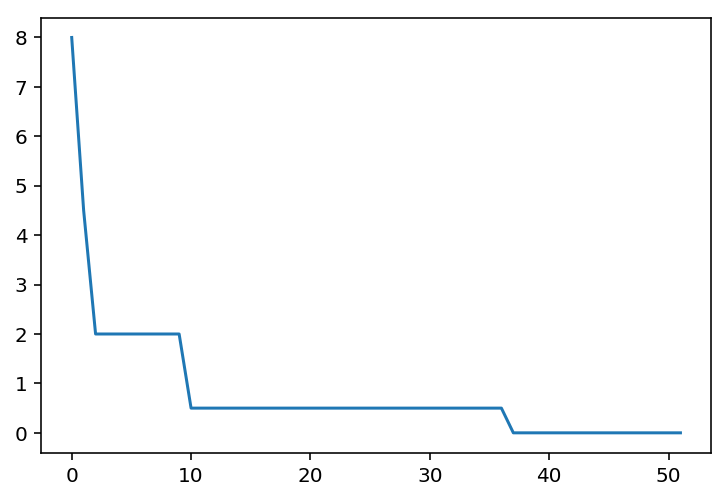

In [21]:
temp = mse(full)
error = temp.values
error[::-1].sort()
error
plt.plot(error)

In [22]:
print( lambda x,y : full[[]])

<function <lambda> at 0x1a0eb08598>


In [23]:
df_sim_error_dist = full[['sim','error']]
df_sim_error_dist.error = (df_sim_error_dist.error**2)/2
mi = df_sim_error_dist.error.min()
mx = df_sim_error_dist.error.max()
df_sim_error_dist.error = df_sim_error_dist.error/(mx-mi) # normalized

/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


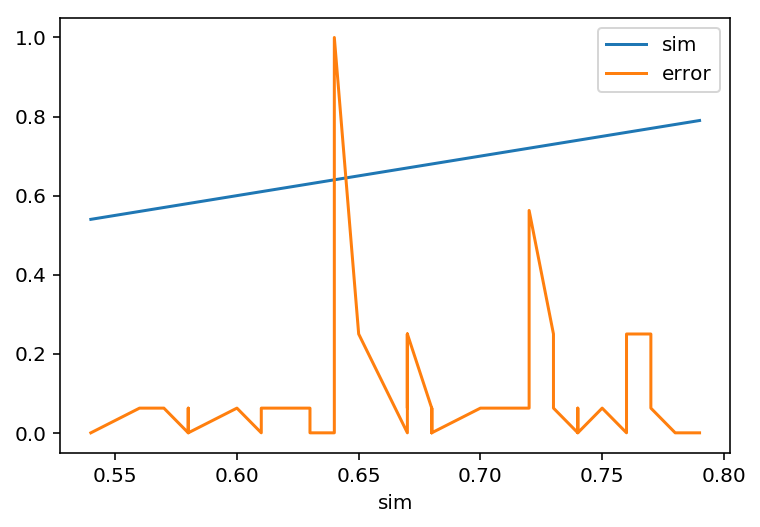

In [24]:
df_sim_error_dist.sort_values( by='sim', ascending=False, inplace=True)
df_sim_error_dist = df_sim_error_dist.set_index( df_sim_error_dist.sim )
df_sim_error_dist.plot()

In [25]:
def itrate():
    qList, cList, queries, casebase, = loo_query_n_cb( query_size=52)
    #print(qList)
    #print(len( casebase.split(',')))
    df_q_result = executeSimOnSelectedCases( listOfRetrievalCases=queries, listOfCbCases=casebase, k=1)
    df_q_result.dropna( how='all')
    
    max_sim_id = lambda x : extract_data( df_q_result,x)
    full = list(map(max_sim_id, df_q_result.columns))
    full = pd.DataFrame(full, columns=['quary_id', 'case_id','sim','q_id', 'c_id','query_gpe','case_gpe','error'])
    
    df_sim_error_dist = full[['sim','error']]
    df_sim_error_dist.error = (df_sim_error_dist.error**2)/2
    mi = df_sim_error_dist.error.min()
    mx = df_sim_error_dist.error.max()
    df_sim_error_dist.error = df_sim_error_dist.error/(mx-mi) # normalized
    
    df_sim_error_dist.sort_values( by='sim', ascending=False, inplace=True)
    df_sim_error_dist = df_sim_error_dist.set_index( df_sim_error_dist.sim )
    df_sim_error_dist.plot()
    return df_sim_error_dist

/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/amar/Software/python/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


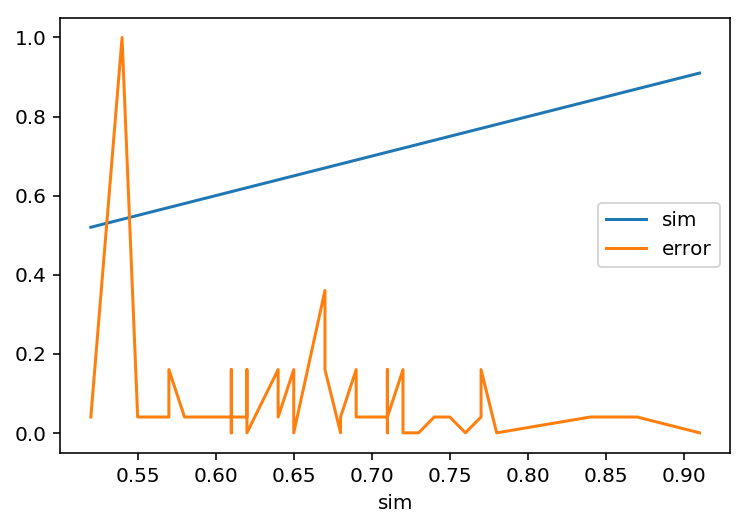

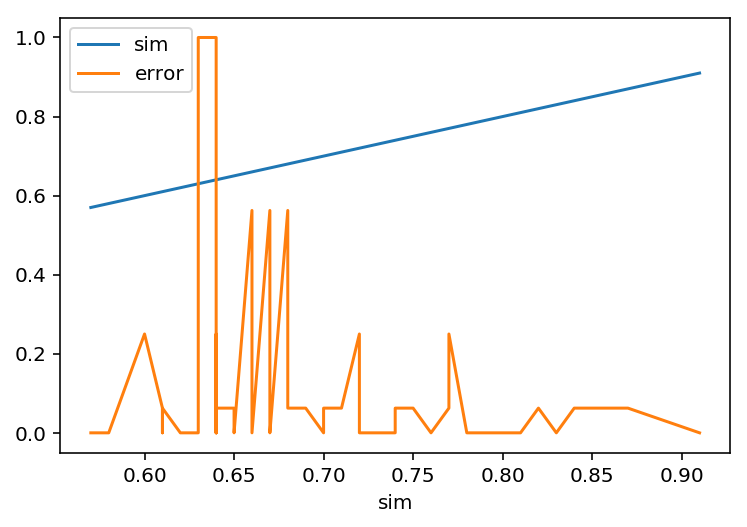

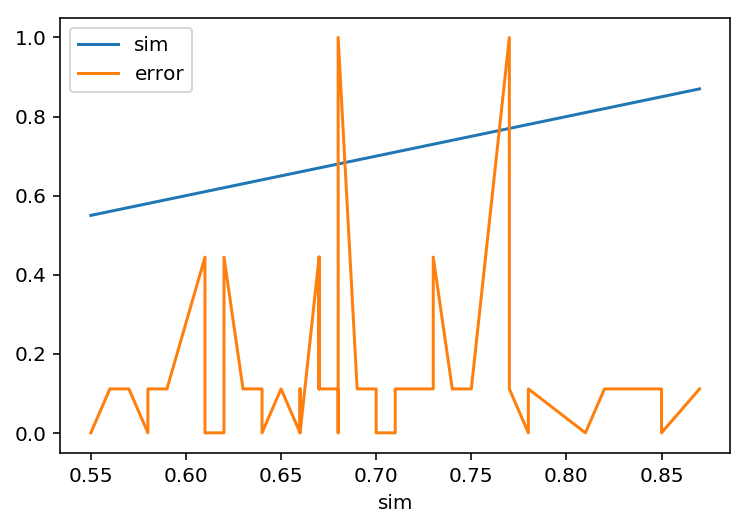

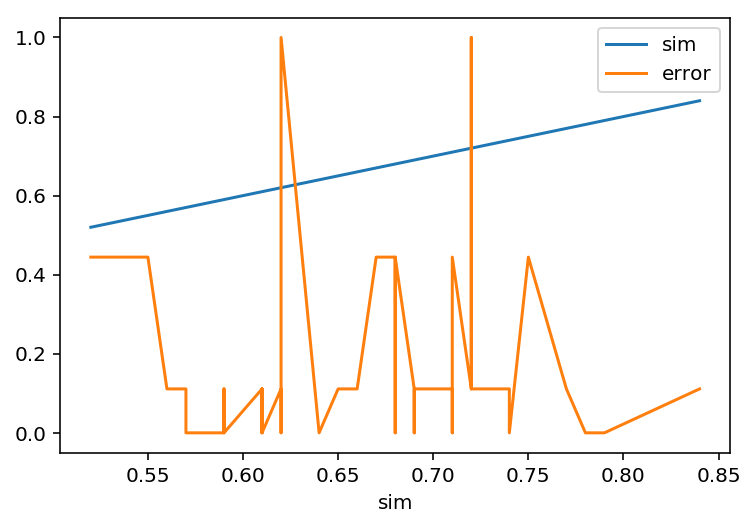

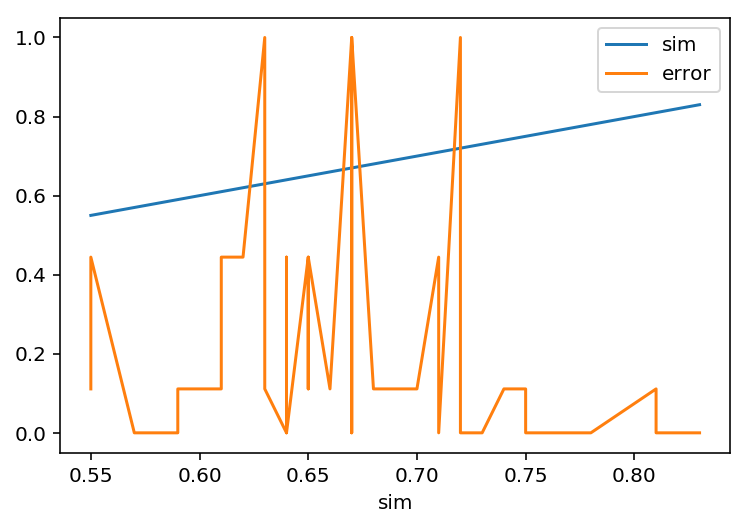

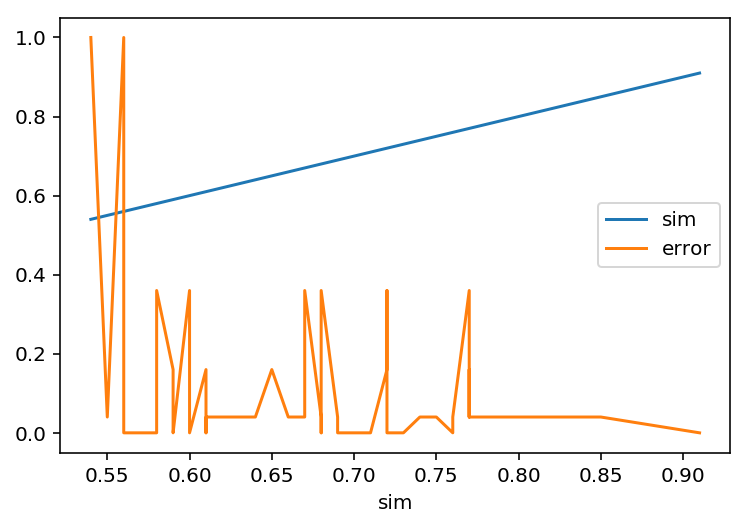

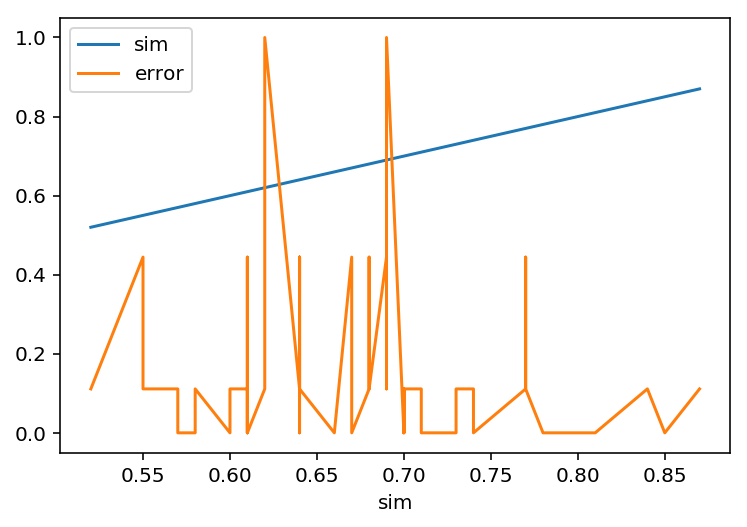

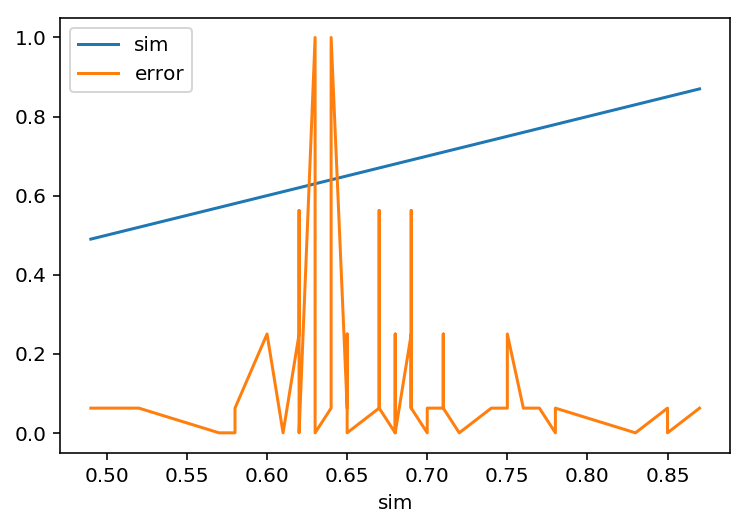

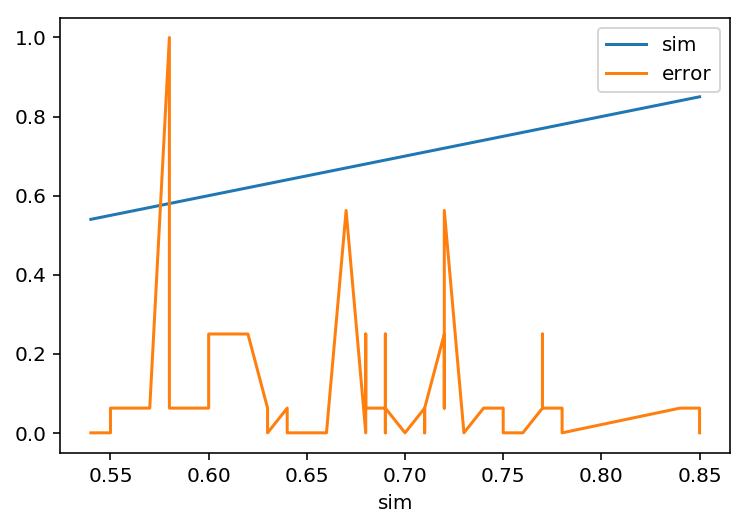

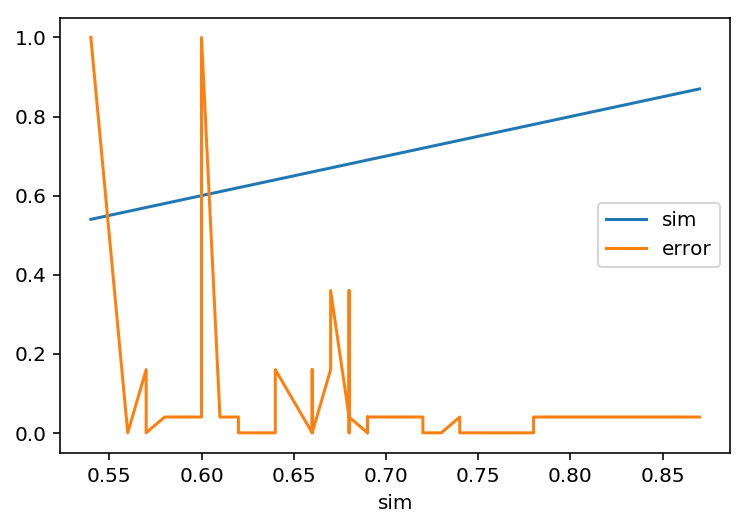

In [26]:
df_1 = itrate()
df_2 = itrate()
df_3 = itrate()
df_4 = itrate()
df_5 = itrate()
df_6 = itrate()
df_7 = itrate()
df_8 = itrate()
df_9 = itrate()
df_10 = itrate()